# Keras Basics

In [1]:
import warnings
warnings.filterwarnings("ignore")

import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

Using TensorFlow backend.


## Simple y=mx+b+noise data

In [2]:
m = 2
b = 3
x = np.linspace(0,50,100)  # linearly spaced 100 data points between 0 to 50
x

array([ 0.        ,  0.50505051,  1.01010101,  1.51515152,  2.02020202,
        2.52525253,  3.03030303,  3.53535354,  4.04040404,  4.54545455,
        5.05050505,  5.55555556,  6.06060606,  6.56565657,  7.07070707,
        7.57575758,  8.08080808,  8.58585859,  9.09090909,  9.5959596 ,
       10.1010101 , 10.60606061, 11.11111111, 11.61616162, 12.12121212,
       12.62626263, 13.13131313, 13.63636364, 14.14141414, 14.64646465,
       15.15151515, 15.65656566, 16.16161616, 16.66666667, 17.17171717,
       17.67676768, 18.18181818, 18.68686869, 19.19191919, 19.6969697 ,
       20.2020202 , 20.70707071, 21.21212121, 21.71717172, 22.22222222,
       22.72727273, 23.23232323, 23.73737374, 24.24242424, 24.74747475,
       25.25252525, 25.75757576, 26.26262626, 26.76767677, 27.27272727,
       27.77777778, 28.28282828, 28.78787879, 29.29292929, 29.7979798 ,
       30.3030303 , 30.80808081, 31.31313131, 31.81818182, 32.32323232,
       32.82828283, 33.33333333, 33.83838384, 34.34343434, 34.84

In [3]:
# 101 is an arbitrary choice to make sure your random values are same as mine!
np.random.seed(101) 
noise = np.random.normal(loc=0.0,scale=4.0,size=len(x))  #loc is mean and scale is standard deviation
noise

array([ 1.08273994e+01,  2.51253084e+00,  3.63187779e+00,  2.01530302e+00,
        2.60447179e+00, -1.27727218e+00, -3.39230793e+00,  2.42386140e+00,
       -8.07267298e+00,  2.96048823e+00,  2.11525398e+00, -2.35600213e+00,
        7.54781238e-01, -3.03548822e+00, -3.73294887e+00,  3.82022604e+00,
        7.63177289e-01,  7.91502930e+00,  1.04238691e+01,  2.73403554e+00,
        1.21066179e+00,  6.77489170e+00, -6.82434372e+00, -4.63647766e+00,
       -5.39362882e-01,  1.56211137e+00,  6.67618544e-01,  7.38007437e-01,
        3.23082366e+00,  2.91838701e-01,  2.55514805e+00,  1.31858520e+00,
       -1.98841609e+00, -3.01627880e+00, -3.77362561e+00,  1.93900659e+00,
       -4.67093266e-01,  7.60701918e+00,  9.52507835e-01,  7.98660914e+00,
       -3.97305400e+00,  7.87198020e-01, -4.54657837e+00,  1.46591842e-03,
        4.10393661e+00, -6.26391617e-01, -1.26316576e-01,  2.59930333e+00,
        8.61938577e+00, -2.44103542e+00, -3.02130136e+00, -1.38567401e+00,
        5.88107085e-01, -

In [4]:
y = 2*x + b + noise

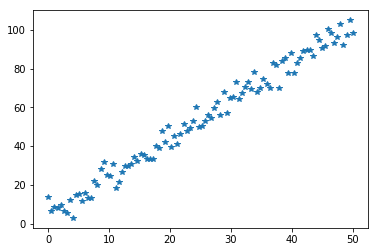

In [5]:
plt.plot(x,y,'*');

## Creating a Neural Network for a Line of Best Fit

In [6]:
from keras.models import Sequential   #allows to add bunch of neural network layers in sequence
from keras.layers import Dense       #neurons from previous layer connected to next and so on as dense layer

In [7]:
model = Sequential()
# 4 output Neurons in first layer, expecting only 1 feature with input_dim=1
model.add(Dense(4, input_dim=1, activation='relu'))
# 4 Neurons (Play around with this number!)
model.add(Dense(4, activation='relu'))
# One final output of y, so only 1 neuron as output at last layer
model.add(Dense(1, activation='linear'))
# Compile the layers
model.compile(loss='mse', optimizer='adam')

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 8         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


## Train on Data

** NOTE: FOR THIS SIMPLE EXAMPLE, I WILL SKIP THE TRAIN TEST SPLIT!!!! **

In [9]:
model.fit(x, y, epochs=200, verbose=1)

Epoch 1/200
100/100 [==============================] - 1s 6ms/step - loss: 3628.1379
Epoch 2/200
100/100 [==============================] - 0s 79us/step - loss: 3620.4816
Epoch 3/200
100/100 [==============================] - 0s 81us/step - loss: 3612.4745
Epoch 4/200
100/100 [==============================] - 0s 84us/step - loss: 3604.3129
Epoch 5/200
100/100 [==============================] - 0s 85us/step - loss: 3596.3840
Epoch 6/200
100/100 [==============================] - 0s 82us/step - loss: 3587.4665
Epoch 7/200
100/100 [==============================] - 0s 78us/step - loss: 3578.6162
Epoch 8/200
100/100 [==============================] - 0s 85us/step - loss: 3569.8098
Epoch 9/200
100/100 [==============================] - 0s 88us/step - loss: 3560.6288
Epoch 10/200
100/100 [==============================] - 0s 82us/step - loss: 3550.9432
Epoch 11/200
100/100 [==============================] - 0s 78us/step - loss: 3541.3758
Epoch 12/200
100/100 [==============================]

100/100 [==============================] - 0s 78us/step - loss: 1533.2130
Epoch 95/200
100/100 [==============================] - 0s 125us/step - loss: 1501.1311
Epoch 96/200
100/100 [==============================] - 0s 111us/step - loss: 1466.7497
Epoch 97/200
100/100 [==============================] - 0s 128us/step - loss: 1434.7622
Epoch 98/200
100/100 [==============================] - 0s 112us/step - loss: 1403.0251
Epoch 99/200
100/100 [==============================] - 0s 146us/step - loss: 1370.6524
Epoch 100/200
100/100 [==============================] - 0s 73us/step - loss: 1337.3521
Epoch 101/200
100/100 [==============================] - 0s 126us/step - loss: 1304.6556
Epoch 102/200
100/100 [==============================] - 0s 76us/step - loss: 1273.8065
Epoch 103/200
100/100 [==============================] - 0s 161us/step - loss: 1241.3429
Epoch 104/200
100/100 [==============================] - 0s 71us/step - loss: 1210.3265
Epoch 105/200
100/100 [=====================

100/100 [==============================] - 0s 138us/step - loss: 31.7580
Epoch 188/200
100/100 [==============================] - 0s 80us/step - loss: 30.7126
Epoch 189/200
100/100 [==============================] - 0s 77us/step - loss: 29.7450
Epoch 190/200
100/100 [==============================] - 0s 108us/step - loss: 28.7997
Epoch 191/200
100/100 [==============================] - 0s 92us/step - loss: 27.9480
Epoch 192/200
100/100 [==============================] - 0s 123us/step - loss: 27.1404
Epoch 193/200
100/100 [==============================] - 0s 93us/step - loss: 26.3141
Epoch 194/200
100/100 [==============================] - 0s 148us/step - loss: 25.5605
Epoch 195/200
100/100 [==============================] - 0s 128us/step - loss: 24.8686
Epoch 196/200
100/100 [==============================] - 0s 89us/step - loss: 24.2631
Epoch 197/200
100/100 [==============================] - 0s 116us/step - loss: 23.7147
Epoch 198/200
100/100 [==============================] - 0s 12

In [10]:
model.history.history['loss']

[3628.13794921875,
 3620.4816015625,
 3612.474462890625,
 3604.31287109375,
 3596.383955078125,
 3587.46646484375,
 3578.61623046875,
 3569.8098046875,
 3560.628828125,
 3550.94322265625,
 3541.37580078125,
 3530.743720703125,
 3520.092763671875,
 3510.0146484375,
 3499.48431640625,
 3487.946083984375,
 3476.8884375,
 3465.2064453125,
 3452.6134765625,
 3439.47638671875,
 3427.147421875,
 3412.745810546875,
 3398.36732421875,
 3384.25416015625,
 3369.31021484375,
 3354.136953125,
 3338.81705078125,
 3322.748125,
 3305.92904296875,
 3290.0987109375,
 3273.16099609375,
 3255.7970751953126,
 3237.71130859375,
 3220.677109375,
 3202.406943359375,
 3183.759716796875,
 3165.42189453125,
 3145.84962890625,
 3126.923359375,
 3107.818349609375,
 3086.79849609375,
 3065.042265625,
 3044.398662109375,
 3022.08859375,
 3000.648779296875,
 2976.507412109375,
 2954.943779296875,
 2931.958037109375,
 2909.200029296875,
 2885.326826171875,
 2861.82478515625,
 2836.650205078125,
 2811.5213671875,
 2786

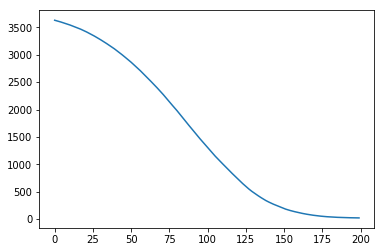

In [11]:
loss = model.history.history['loss']
epochs = range(len(loss))

plt.plot(epochs, loss)

## Predicting on new x points

Our previous x was 50 linspace points between 0 and 100. Let's predict for 1000 values between 0 and 100, drawing a line for our predictions (our line of best fit).

In [12]:
x_for_predictions = np.linspace(0,50,1000)

In [13]:
y_predicted = model.predict(x_for_predictions)

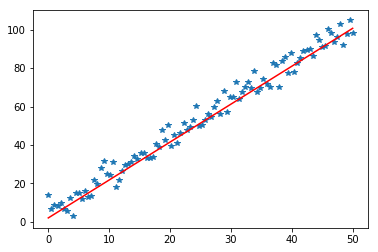

In [14]:
# Original X and Y
plt.plot(x,y,'*')
# Our Model's prediction Line
plt.plot(x_for_predictions,y_predicted,'r')   #r for red line

# Evaluating Our Error

In [15]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [16]:
# Labels we do know
prediction_for_true_y = model.predict(x)

In [17]:
mean_squared_error(y,prediction_for_true_y)

22.11603736275938

In [18]:
mean_absolute_error(y,prediction_for_true_y)

3.778922738732998

 Notice how MSE value was being reported out by Keras during training!